# Texata Final


## Parameters

In [1]:
max_articles = 200
max_defects = 200
max_content = 800

## Data preparation

Start with defects

In [2]:
data_dir = '../data/Hackathon-Texata-2015/Defects-ASR9k/'

from os import listdir
from os.path import join
data_files = [ join(data_dir, f) for f in listdir(data_dir) ]

In [3]:
import xml.etree.ElementTree as ET

def readDefectFile(file_path):
    tree = ET.parse(file_path)
    defect = tree.getroot()[0]
    
    result = {}
    result['id'] = defect.get('id')
    result['audits'] = []
    
    for child in defect:
        
        if (child.tag == '{cdetsng}Field'):
            result[child.attrib['name']] = child.text
        elif child.tag == '{cdetsng}AuditTrail':
            result['audits'].append(child.attrib)

    return result

raw_data = map(readDefectFile, data_files[:max_defects])

print 'Rows of raw data: {}'.format(len(raw_data))

Rows of raw data: 200


In [4]:
class data_row(object):
    data = "undefined"
    id = "undefined"
    
    meta = {}

dataset = []

for data in raw_data:
    row = data_row()
    row.data = data['Description'][:max_content]
    row.ids = data['id']
    row.meta['content'] = True
    
    dataset.append(row)
    

In [5]:
%time
from sklearn.feature_extraction.text import TfidfVectorizer
print("Extracting features from the training dataset using a sparse vectorizer")


vectorizer = TfidfVectorizer(max_df=0.5, max_features=5000,
                                 min_df=2, stop_words='english')

X = vectorizer.fit_transform(map(lambda row: row.data, dataset))

print("n_samples: %d, n_features: %d" % X.shape)

CPU times: user 39 µs, sys: 8 µs, total: 47 µs
Wall time: 16.9 µs
Extracting features from the training dataset using a sparse vectorizer
n_samples: 200, n_features: 937


In [6]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_pca = pca.fit_transform(X.toarray())

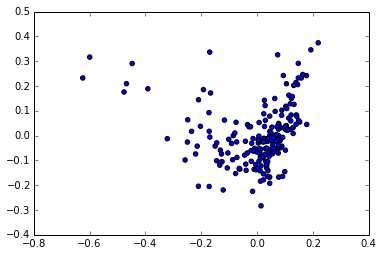

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1])

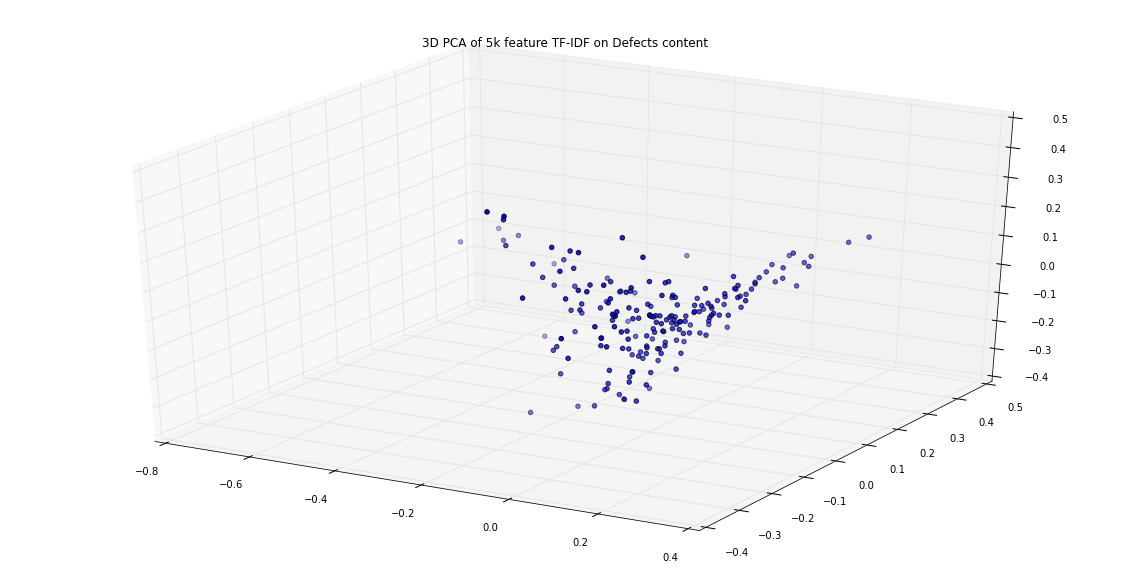

In [8]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(3)
X_pca_3 = pca.fit_transform(X.toarray())

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2])

plt.title('3D PCA of 5k feature TF-IDF on Defects content')
plt.show()


In [9]:
%time
from sklearn.manifold import Isomap

iso = Isomap()
X_iso = iso.fit_transform(X.toarray())

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 19.1 µs


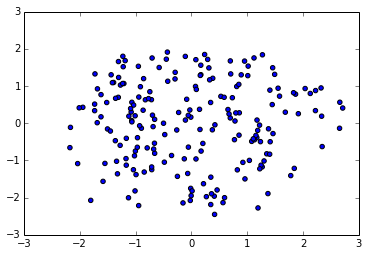

In [10]:
plt.scatter(X_iso[:, 0], X_iso[:, 1])

In [11]:
%time
from sklearn.cluster import KMeans

k_means = KMeans(5)
clusters = k_means.fit_predict(X_iso)

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 19.1 µs


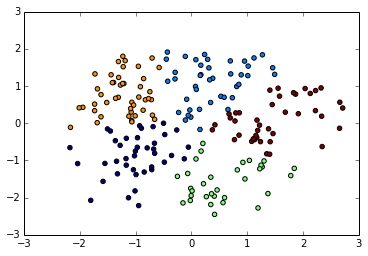

In [12]:
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)

In [13]:
%time
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X_iso)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 11 µs


In [14]:
distances, indices = nbrs.kneighbors(X_iso[0])

print dataset[0].data
print dataset[indices[0][1]].data
print dataset[indices[0][2]].data

1st rebase of scf-dev to viking-red-oct
In the GRE ipv6 ENCAP path, in MODIFY stage, before adding outer GRE IPv6 header, check need to be made if prior lookup was successful. At present no check is made, if prior lookup fails still header is added with 0 as src/dst. This DDTS is to track this change which will be fixed by Guichuan (gtang)
After interface shut/no shut, mpls-tp session stays in DOWN forever

I have configured one mpls-tp session before I bring up the physical interface. After configured the TP session, I have configured the physical interface. BFD session took almost more than 3mins for the bfd session bring up. I did interface shut/ no shut. After that the mpls-tp session stuck in DOWN state forever.

Attached the console log.


In [15]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(X)

distances, indices = nbrs.kneighbors(X[0])

print '-- original --'
print dataset[0].data
print '-- first related --'
print dataset[indices[0][1]].data
print '-- second related --'
print dataset[indices[0][2]].data

-- original --
1st rebase of scf-dev to viking-red-oct
-- first related --
viking-red-oct rebase to ci-37.lu%EFR-00000063369

-- second related --
Kernel keeps on crashing on Trident LC every few mins. Also in harddisk:/dumper, all generated pcds files are 0 bytes. Please advice if new triage is needed to track 0 bytes .pcds files.

Logs: /auto/viking-CDETS-logs/ankishah/420/22I/<bug id>
Please also see the bug debug info for more logs

Impact: Traffic / System / Functionality / Usability 

===Snippet of logs==

g_lc[151637]|Line card NPU loopback Test(0x2000006)| 
LC/0/2/CPU0:Oct 28 01:20:25.639 : pfm_node_lc[283]: prm_fast_reset_subset fast reset api succeeded for chan 3  
LC/0/2/CPU0:Oct 28 01:20:25.640 : pfm_node_lc[283]: NP loopback recovery action: Succeded (NP bitmask:0x8)
LC/0/0/CPU0:Oct 28 01:20:26.127 : envmon_lc[161]: %PLATFORM-ENVMON-4-OPERATION_WARN : Unable to get plug sensor data for EP 0, error code No suc


In [16]:
import re

data_dir = '../data/Hackathon-Texata-2015/TechZone/'

def readTechzoneFile(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    results = []
    
    for techzone in root:
        
        if (techzone.tag == '{cdetsng}techZoneContent'):
            result = {}
            result['id'] = techzone.attrib['id']
            
            content = techzone.find('{cdetsng}content').text
            
            if content:
                if isinstance(content, unicode):
                    content = re.sub(r'[^\x00-\x7F]+',' ', content.encode('utf-8'))[:max_content]
                
                result['content'] = content
                results.append(result)
        else:
            print techzone.tag
            

    return results

raw_tz_data = readTechzoneFile(join(data_dir, 'tz_content_sample_10192015.xml'))
print 'Techzone articles: {}'.format(len(raw_tz_data))
print raw_tz_data[0]['id']
print raw_tz_data[0]['content']

Techzone articles: 9885
100022
 [623326813] Solution: administration play does not show the logo for "Cisco Jabber for Tablet". 
    Symptoms 

  
 customer cannot see the logo for Cisco Jabber for Tablet icon in CUCM 8.5.1
 
Cause / Problem Description 
customer installed the cop file cmterm-jabbertablet-100v10-dm.cop.sgn and the device is working good but customer cannot see the logo. customer has the same setting in the lab but they can see the logo as:
  
 
 
Conditions / Environment 
CUCM 8.5.1.11900-21 and cop file cmterm-jabbertablet-100v10-dm.cop.sgn
 
Resolution 
check the page source and can see:
  
 </select></td></tr></table></div><table cellspacing='0' width='100%' class='cuesTableBg' border='0' summary='Find List Table Result'><tr class='cuesTableBg'><th id='check' align='absmiddle'><input value='true' cla


In [17]:
for data in raw_tz_data[:max_articles]:
    row = data_row()
    row.data = data['content']
    row.ids = data['id']
    row.meta['techzone'] = True
    
    dataset.append(row)

In [18]:
print 'New size of data set: {}'.format(len(dataset))

New size of data set: 400


## Kernel methods

In [19]:
# Subsequence kernel method to compare strings with each other
def SSKernel(xi,xj,lamb,p, cache=None):
    """
    decay factor λ ∈ (0, 1)
    
    It's not commented but, xi and xj are strings,
    lamb and p are parameters described in the paper.

    It also caches already seen pairs of xi and xj.
    """
    if not cache:
        cache = {}
    mykey = (xi, xj) if xi>xj else (xj, xi)
    if not mykey in cache:
        dps = []
        for i in xrange(len(xi)):
            dps_line = [lamb**2 if xi[i] == xj[j] else 0 for j in xrange(len(xj))]
            dps.append(dps_line)
        dp = []
        for i in xrange(len(xi)+1):
            dp.append([0]*(len(xj)+1))
        k = [0]*(p+1)
        for l in xrange(2, p + 1):
            for i in xrange(len(xi)):
                for j in xrange(len(xj)):
                    dp[i+1][j+1] = dps[i][j] + lamb * dp[i][j+1] + lamb * dp[i+1][j] - lamb**2 * dp[i][j]
                    if xi[i] == xj[j]:
                        dps[i][j] = lamb**2 * dp[i][j]
                        k[l] = k[l] + dps[i][j]
        cache[mykey] = k[p]
    return cache[mykey], dp, dps

kernel = lambda xi, xj: SSKernel(xi, xj, 0.5, 5)

0.00208507232129


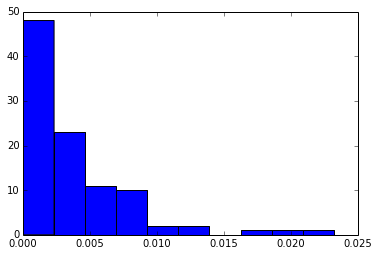

In [20]:
value, _, _ = kernel(dataset[0].data, dataset[1].data)
print value
sim = lambda s: kernel(dataset[0].data, s)[0]

similarities = map(lambda row: sim(row.data), dataset[1:100])
plt.hist(similarities, bins=10)
plt.show()

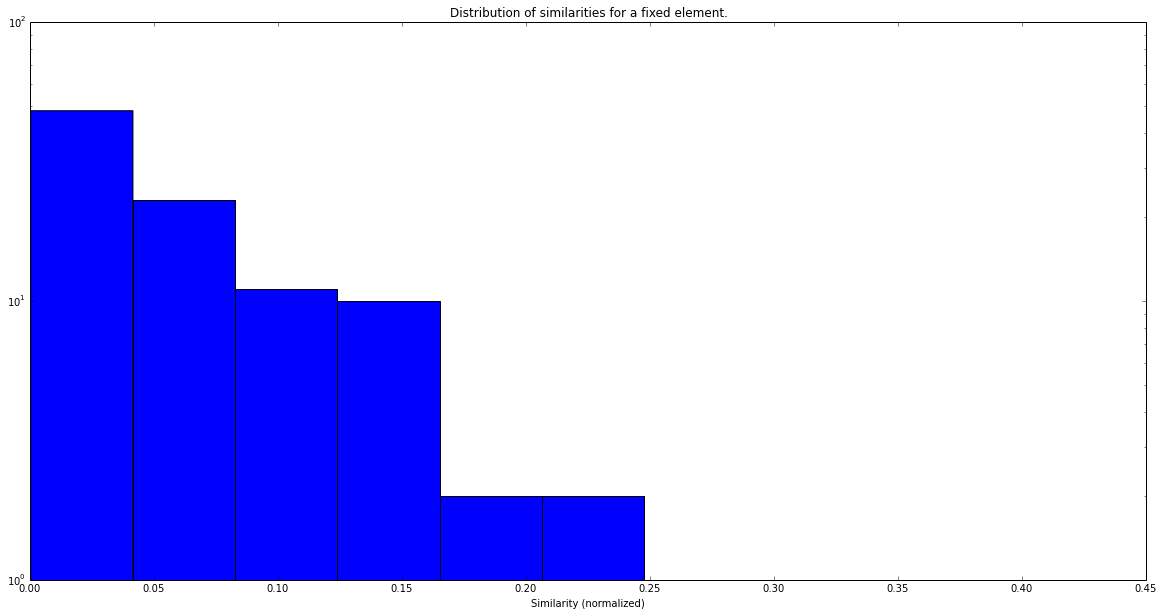

In [21]:
from sklearn.preprocessing import Normalizer

normalized_similarities = Normalizer().fit_transform(similarities)
plt.figure(figsize=(20, 10))
plt.hist(normalized_similarities.ravel(), log=True)
plt.xlabel('Similarity (normalized)')
plt.title('Distribution of similarities for a fixed element.')

In [ ]:
import numpy as np

def get_similarities(item, idx=None):
    sim = lambda s: kernel(item, s)[0]
    similarities = map(lambda row: sim(row.data), dataset)
    
    if idx:
        similarities[idx] = 0.0 # hack
        
    return similarities

def find_most_similar(item, idx=None):
    similarities = get_similarities(item, idx)
    max_idx = similarities.index(max(similarities))
    return max_idx

item = dataset[100].data
max_idx = find_most_similar(item, 100)
print item
print dataset[max_idx].data

As part of CSCtl56154 in order to support type 4 PW on bridges (VPLS) a new transport mode is added to the pw class provisioning. This allows type 4 to be supported onASR9Ks.

Old Syntax	
encapsulation mpls transport-mode vlan

New Syntax	
encapsulation mpls transport-mode vlan [passthrough]

This needs to be added to the documentation.


 Q&A: Endpoint registration problems with the Cisco VCS 
    Question 
Endpoint registration problems with the Cisco VCS
 
Answer 
Endpoint registration problems with the Cisco TelePresence Video Communication Server (Cisco VCS)
 Depending upon how you have configured your Cisco VCS, there are several possible reasons why endpoints cannot register. The most likely causes are:
 	registration restriction policy settings
	authentication configuration settings
	undefined SIP domains
	SIP registration proxy mode settings

 To help determine which of these settings is causing the rejections, you should first look at the Cisco VCS's Event Log (Status > Logs 

In [ ]:
kernel_matrix = np.asarray(map(lambda row: np.asarray(get_similarities(row.data)), dataset))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

wards = AgglomerativeClustering(n_clusters=20, linkage=kernel).fit(map(lambda row: row.data, dataset))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=wards)

plt.show()